本篇用来测试浮点转定点`fxp2float_s module`的功能正确性

In [1]:
#软件生成的原始测试文件，包含了一系列16进制表示的FP32测试数据，高位在左，低位在右（因为符合readmem的要求）
origin_target = '/home/superior/AutoEncoder_FPGA/output/tmp/fxp2float_test.hex'
#随后测试数据输入到硬件，硬件通过readmem和writemem完成仿真读取和记录
#硬件输出的定点数FXP[1,7]的数据
verify_target = '/home/superior/AutoEncoder_FPGA/output/tmp/fxp2float_verify.hex'
#输入数据的范围和测试的size
number_min = -1;
number_max = 1;
test_size  = 256;

In [2]:
import struct
import random
from fixedpoint import FixedPoint
origin_lst =[]
with open(origin_target,"w") as file:
    for i in range(256):
        if(i==0):
            a = 0
        else:
            a = random.uniform(number_min,number_max)
        a_obj = FixedPoint(a,signed=True,m=1,n=7,str_base=16,overflow='clamp',overflow_alert='ignore')
        a = float(a_obj)
        a_hex = str(a_obj)
        origin_lst.append((a,a_hex))
        file.write(f"{a_hex}  //{a}\n")

数据准备完毕，去vivado软件中运行仿真

vivado仿真完毕，读取仿真结果并分析

In [3]:
print("-"*65)
print(f"\33[1;7;32m|{'fp32':^12}|{'fp32(hex)':^15}|{'fxp':^20}|{'fxp(hex)':^15}|\33[0m")
print(f"|{'':^12}|{'MSB':<7}{'LSB':>8}|{'':^20}|{'MSB':<7}{'LSB':>8}|")
print("-"*65)
from fixedpoint import FixedPoint
with open(verify_target,"r") as file:
    for i in range(256):
        b_str = file.readline().strip()
        b_bytes = bytes.fromhex(b_str)  # 十六进制字符串转为字节数据
        b = struct.unpack('!f', b_bytes)[0]  # 解码为浮点数
        print(f"\33[37;1m|{origin_lst[i][0]:>12}|{origin_lst[i][1]:>15}|{float(b):>20}|{b_str:>15}|\33[0m")

-----------------------------------------------------------------
|    fp32    |   fp32(hex)   |        fxp         |   fxp(hex)    |
|            |MSB         LSB|                    |MSB         LSB|
-----------------------------------------------------------------
|         0.0|             00|                 0.0|       00000000|
|  -0.1171875|             f1|          -0.1171875|       bdf00000|
|      0.9375|             78|              0.9375|       3f700000|
|    0.234375|             1e|            0.234375|       3e700000|
|      -0.375|             d0|              -0.375|       bec00000|
|   0.0078125|             01|           0.0078125|       3c000000|
|   0.0234375|             03|           0.0234375|       3cc00000|
|       0.375|             30|               0.375|       3ec00000|
|    0.140625|             12|            0.140625|       3e100000|
|   0.3984375|             33|           0.3984375|       3ecc0000|
|    0.734375|             5e|            0.734375| 

vivado仿真结果如下
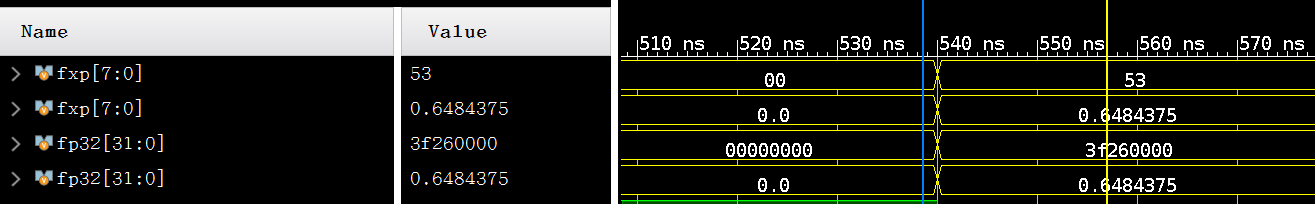  